In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import glob
import os
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.palettes import GnBu3, OrRd3

In [55]:
df = pd.read_csv('./data/cleaned_uci_data_12_19.csv')

In [59]:
df.head()

,Unnamed: 0,Start_date,End_Date,Name,Country,Category,Class,Season,Race_Days,uci_name,continent,name,country,latitude,longitude,Continent
0,0,2017-10-24,2017-10-29,Vuelta a Colombia Femenina Oro y Paz,COLOMBIA,WE,2.2,2018,6.0,COLOMBIA,AMERICAS,Colombia,CO,4.570868,-74.297333,Americas
1,1,2017-10-23,2017-11-01,Vuelta a Guatemala,GUATEMALA,ME,2.2,2018,10.0,GUATEMALA,AMERICAS,Guatemala,GT,15.783471,-90.230759,Americas
2,2,2017-10-27,2017-11-05,Tour du Faso,BURKINA FASO,ME,2.2,2018,10.0,BURKINA FASO,AFRICA,Burkina Faso,BF,12.238333,-1.561593,Africas
3,3,2017-10-27,2017-11-05,Vuelta Ciclista a Venezuela,BOLIVARIAN REPUBLIC OF VENEZUELA,ME,2.2,2018,10.0,BOLIVARIAN REPUBLIC OF VENEZUELA,AMERICAS,Venezuela,VE,6.423750,-66.589730,Americas
4,4,2017-10-28,2017-11-05,Tour of Hainan,PEOPLE'S REPUBLIC OF CHINA,ME,2.HC,2018,9.0,PEOPLE'S REPUBLIC OF CHINA,ASIA,China,CN,35.861660,104.195397,Asia


In [60]:
df = df.loc[df['Season'] > 2009]


In [61]:
# Making filtered dataframes for graphing
me = df.loc[df['Category']=='ME'] #Elite Men
we = df.loc[df['Category']=='WE'] #Elite Women
mj = df.loc[df['Category']=='MJ'] #Junior Men
u23 = df.loc[df['Category']=='MU'] #U23 Men
wj = df.loc[df['Category']=='WJ'] #Junior Women

americas = df.loc[df['Continent']=='Americas']
europe = df.loc[df['Continent']=='Europe']
asia = df.loc[df['Continent']=='Asia']
africa = df.loc[df['Continent']=='Africas']
oceania = df.loc[df['Continent']=='Oceania']

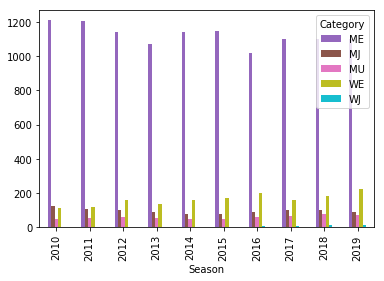

In [71]:
all_races = df.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
# stackedbar(all_races,'Year','Race Days','All Races','all_races')
all_races
data_files = all_races.columns
color_list = ['tab:purple', 'tab:brown', 'tab:pink', 'tab:olive','tab:cyan','tab:orange']
d2c = dict(zip(data_files, color_list))

all_races.plot(kind='bar', color=map(d2c.get,all_races.columns))




In [74]:
def stackedbar(df,x,y,title,outname):
    plt.set_cmap('Set2')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    fig.ylimit=(0,400)
    fig.xlimit=(0,30)
    data_files = all_races.columns
    color_list = ['tab:blue', 'tab:orange', 'tab:olive', 'tab:pink','tab:cyan','tab:red']
    d2c = dict(zip(data_files, color_list))
    df.plot(kind='bar',stacked=True, color=map(d2c.get,df.columns))
    # Add some labels and title
    plt.xlabel(x, fontsize=12, fontweight='bold')
    plt.ylabel(y, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best')
# Save the figure
    plt.savefig(f'./graphics/{outname}.png')

<Figure size 864x576 with 0 Axes>

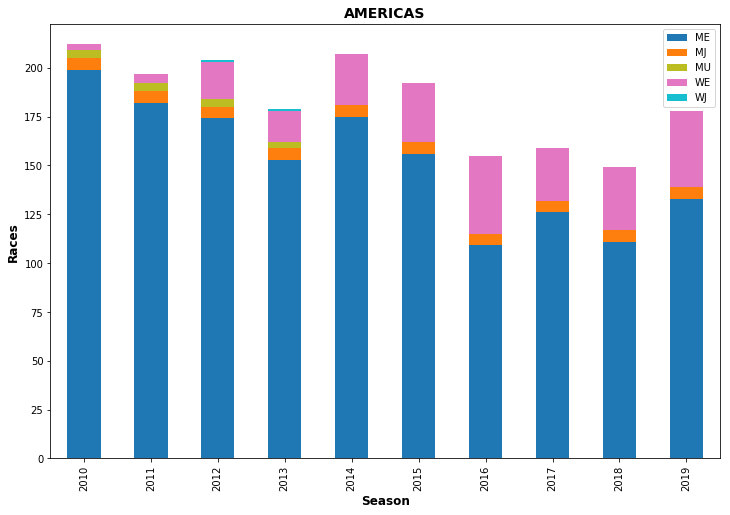

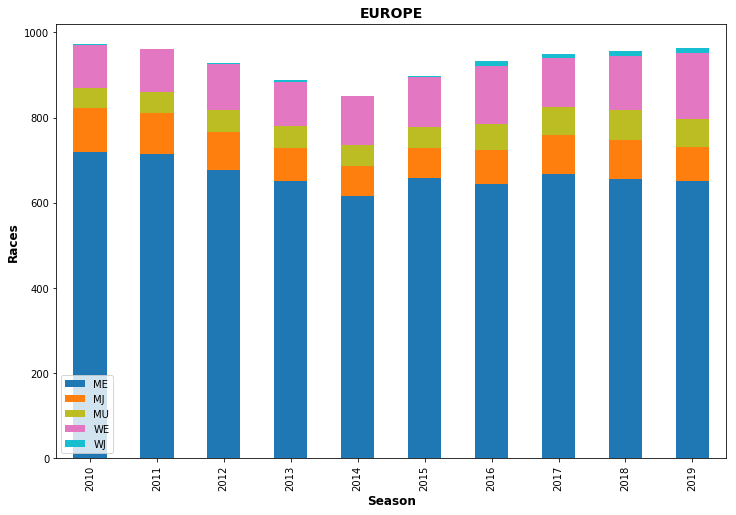

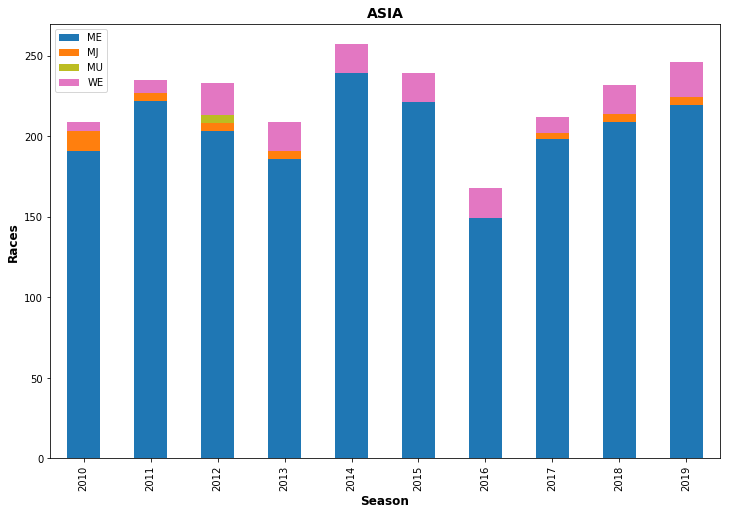

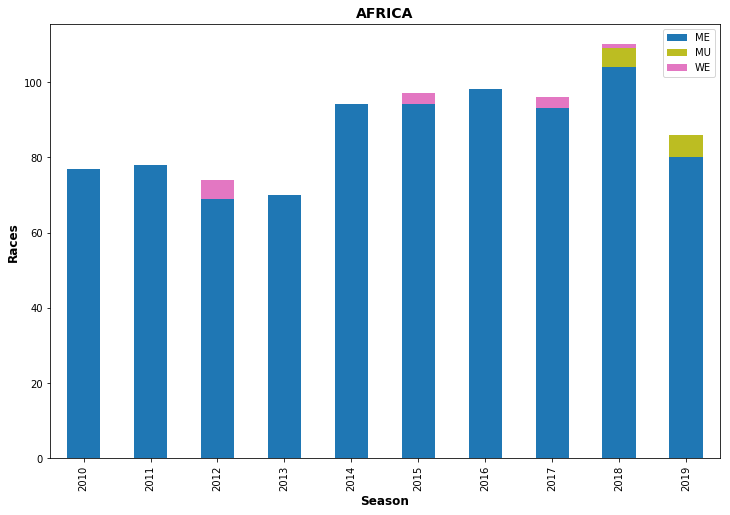

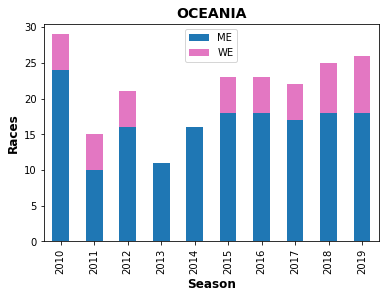

In [77]:
# Graphing by Category
conti_df = [americas,europe,asia,africa,oceania]

try:
    for item in conti_df:
        x = 'Season'
        y = 'Races'
        title = item.continent.min()
        file = 'Continent_' + str(title)
        pdf = item.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

<Figure size 864x576 with 0 Axes>

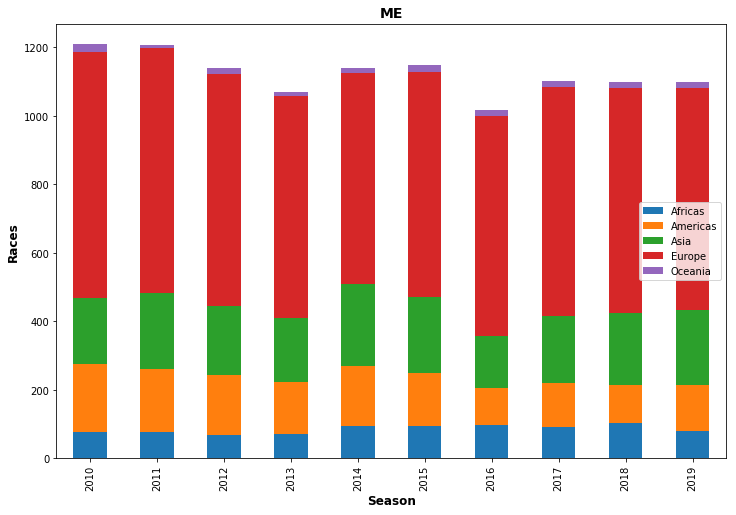

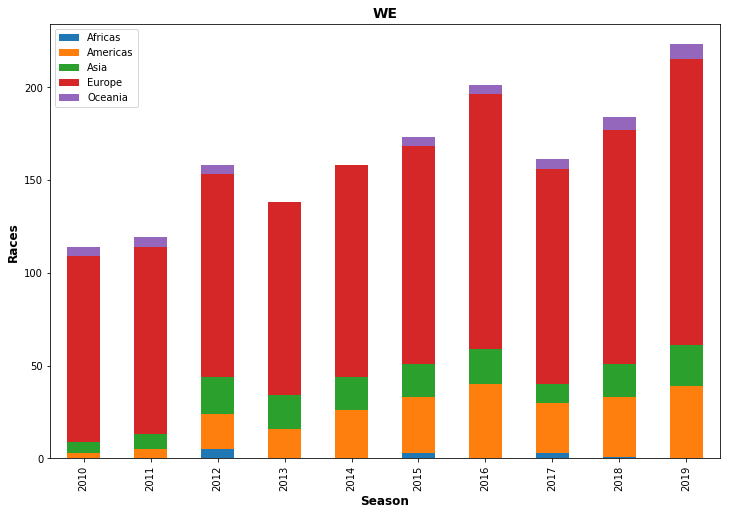

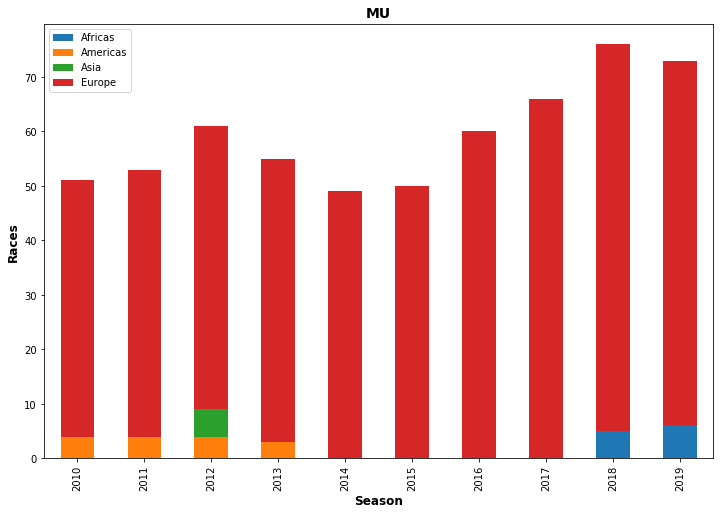

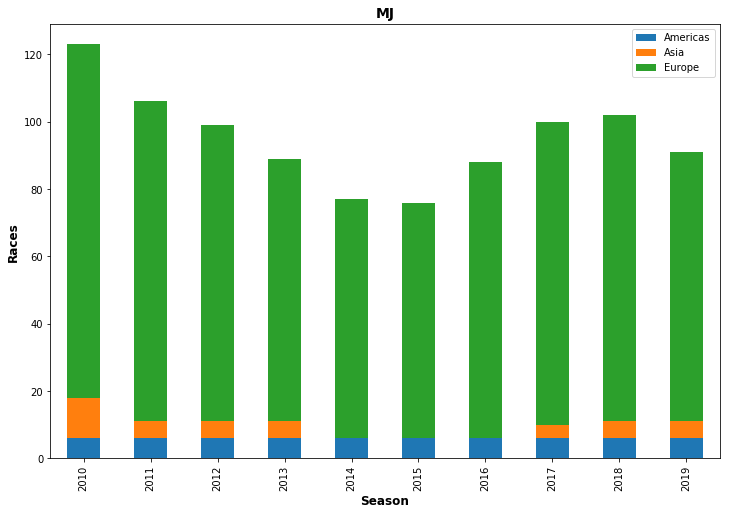

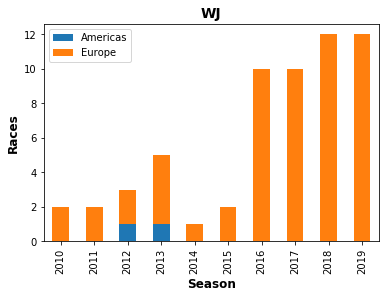

In [76]:
# Graphing by Continent
cat_df = [me,we,u23,mj,wj]

try:
    for item in cat_df:
        x = 'Season'
        y = 'Races'
        title = item.Category.min()
        file = 'Filename_' + str(title)
        pdf = item.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

In [25]:
stackedbar(conti_years,'Season','Races','Overall','Overall_World')


NameError: name 'conti_years' is not defined

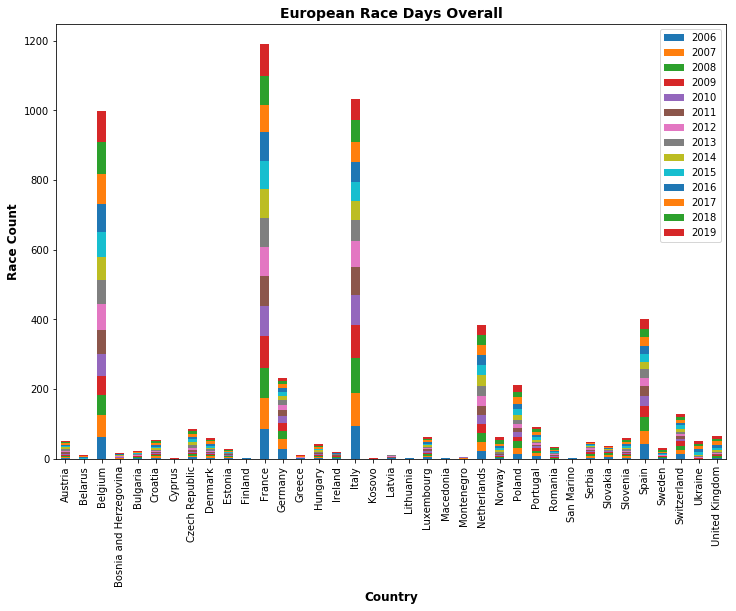

In [11]:
cc_days = europe.groupby(['name','Season'])['Name'].count().unstack('Season')
stackedbar(cc_days,'Country','Race Count','European Race Days Overall','European_Overall_Days')

In [41]:
top7 = ['Belgium','France','Italy','Netherlands','Spain','Poland','Germany','United Kingdom','United States']
top7rc = df.loc[df['name'].isin(top7)]
men_races = top7rc.loc[top7rc['Category']=='ME']
men_races = men_races.groupby(['name','Season'])['Race_Days'].sum().unstack('Season',fill_value=0)
men_races


Season,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
name,,,,,,,,,,
Belgium,69.0,72.0,75.0,70.0,68.0,71.0,68.0,71.0,66.0,62.0
France,201.0,198.0,189.0,183.0,178.0,174.0,177.0,172.0,169.0,177.0
Germany,12.0,12.0,11.0,10.0,10.0,10.0,5.0,5.0,8.0,8.0
Italy,127.0,123.0,101.0,79.0,72.0,67.0,63.0,64.0,71.0,74.0
Netherlands,27.0,28.0,27.0,29.0,28.0,28.0,19.0,23.0,16.0,19.0
Poland,30.0,26.0,27.0,27.0,29.0,39.0,34.0,40.0,37.0,38.0
Spain,97.0,86.0,72.0,66.0,61.0,65.0,71.0,72.0,74.0,75.0
United Kingdom,9.0,10.0,9.0,10.0,11.0,15.0,15.0,15.0,14.0,14.0
United States,12.0,26.0,32.0,31.0,30.0,34.0,27.0,33.0,29.0,25.0


<Figure size 432x288 with 0 Axes>

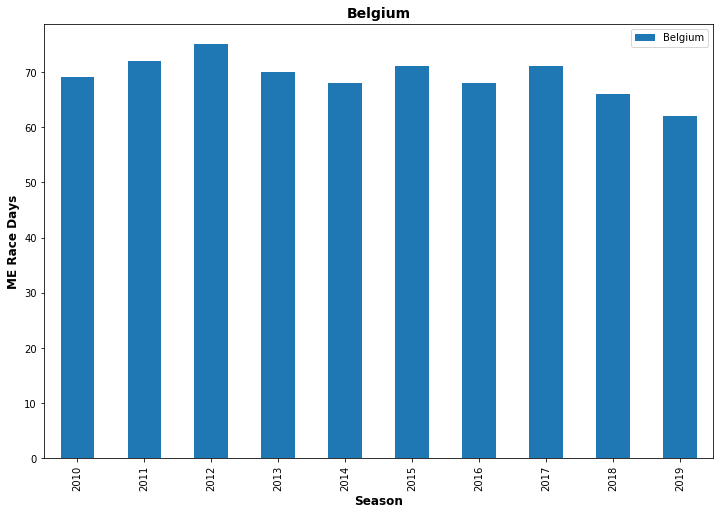

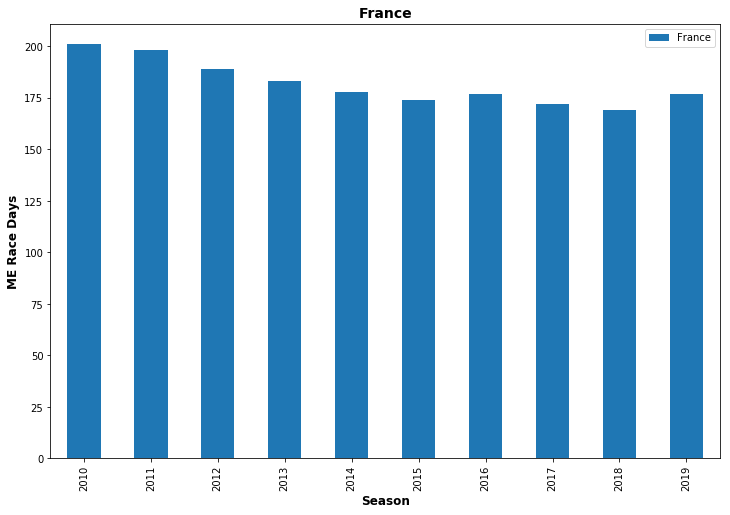

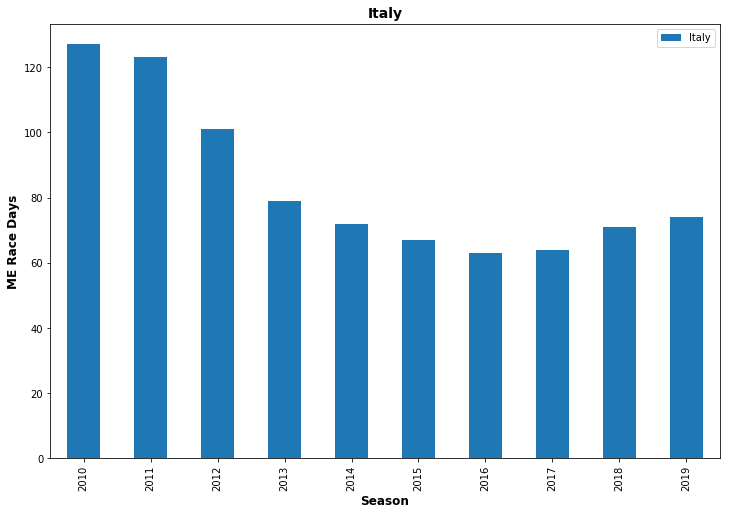

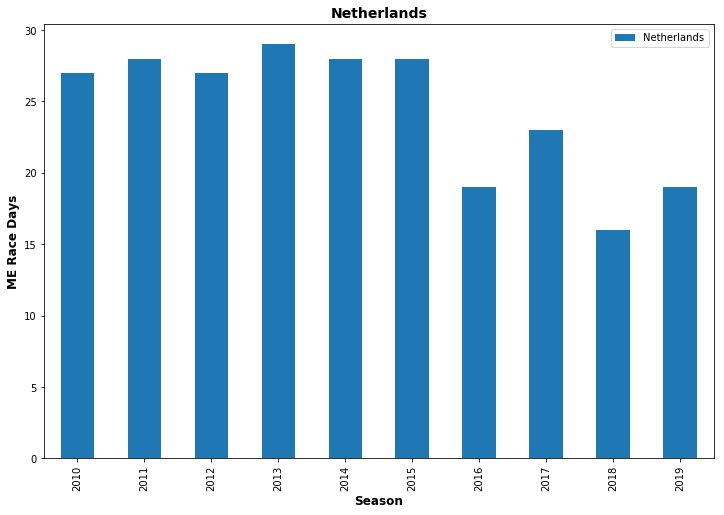

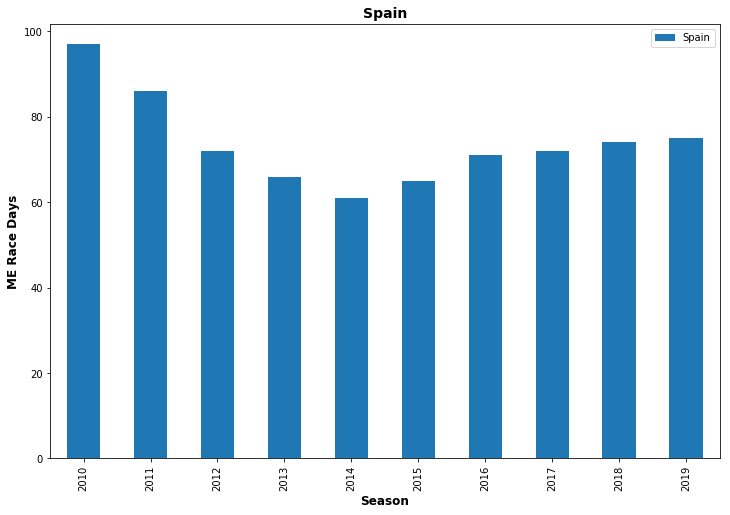

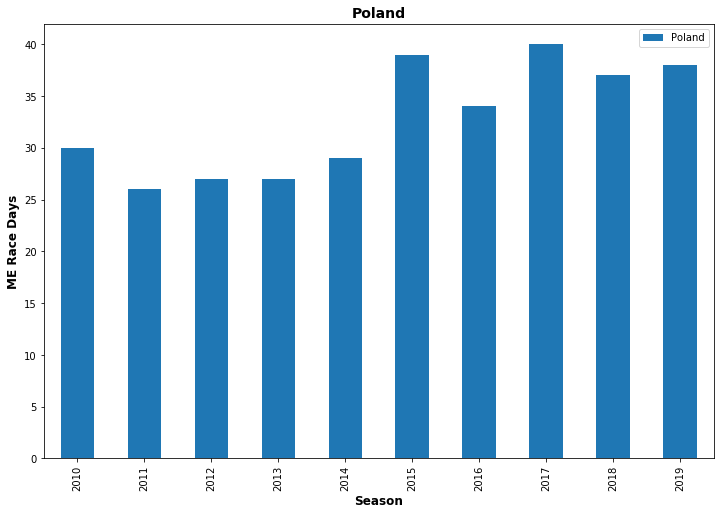

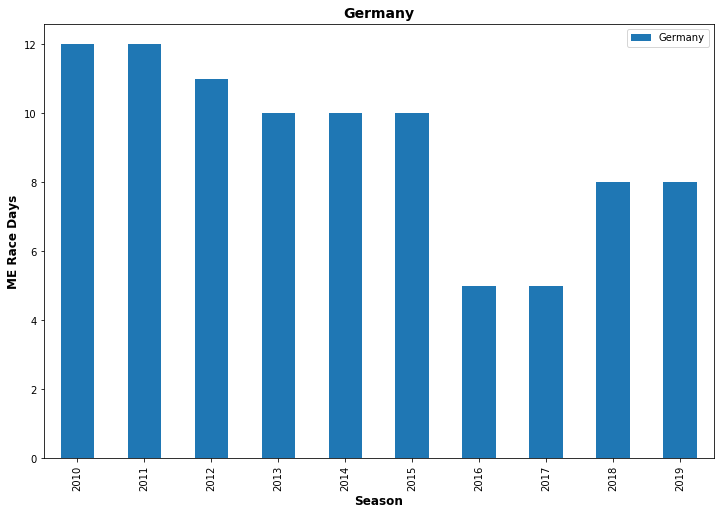

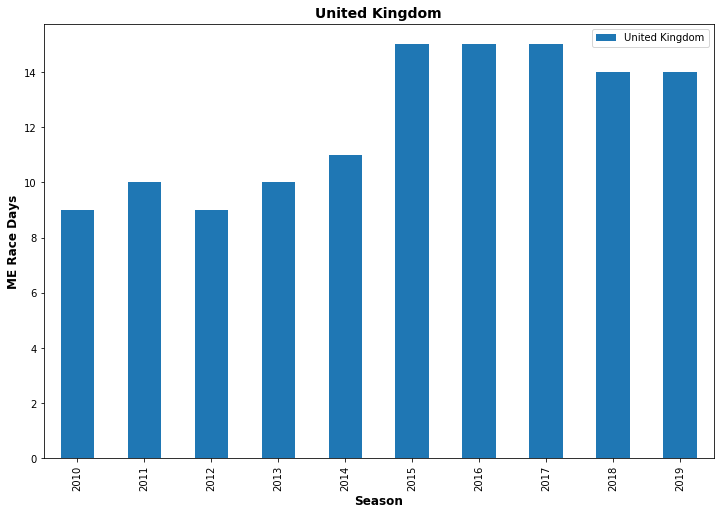

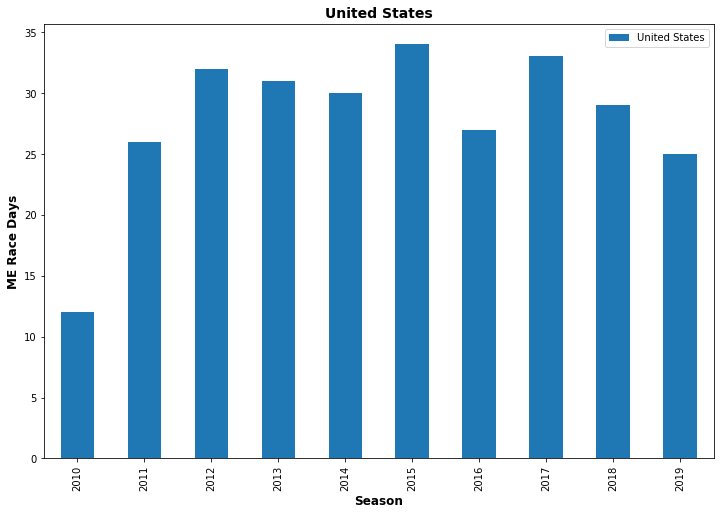

In [42]:
try:
    for item in top7:
        x = 'Season'
        y = 'ME Race Days'
        title = item
        file = 'ME_Filename_' + str(title)
        tdf = me.loc[me['name']==item]
        pdf = tdf.groupby(['name','Season'])['Race_Days'].sum().unstack('name',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

<Figure size 432x288 with 0 Axes>

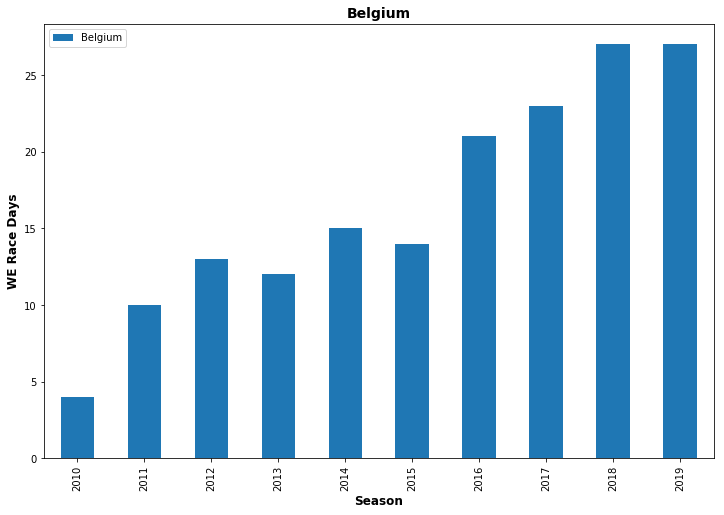

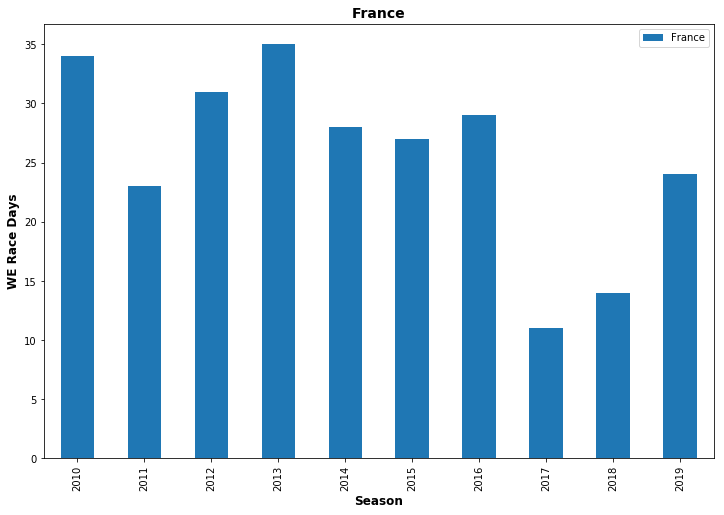

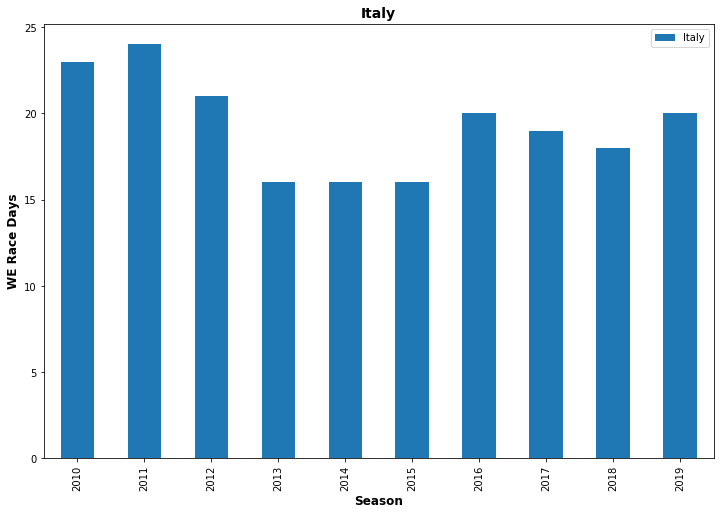

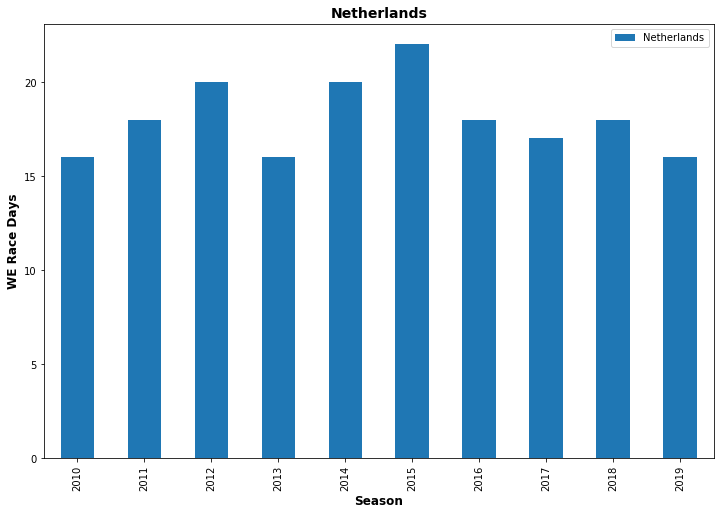

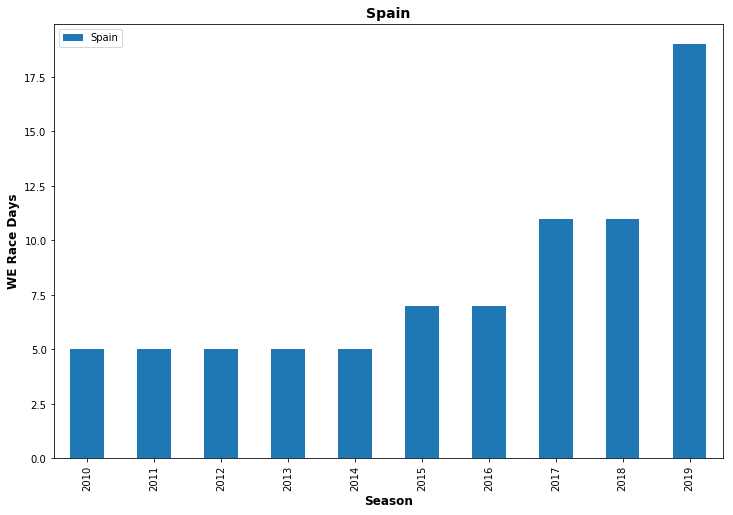

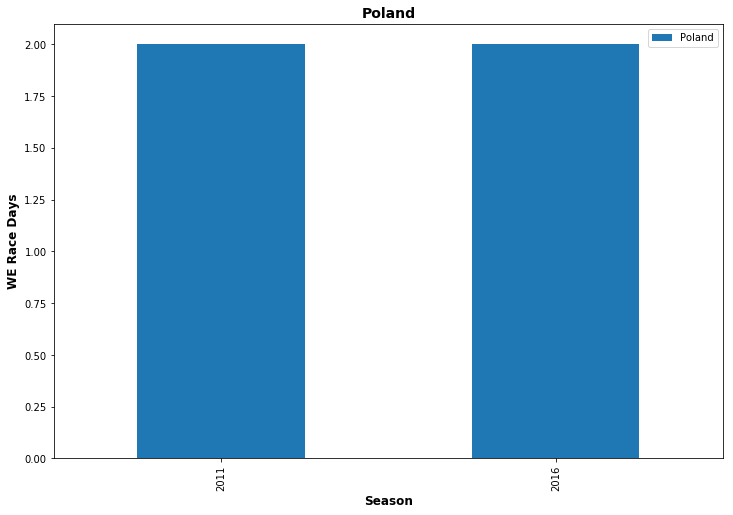

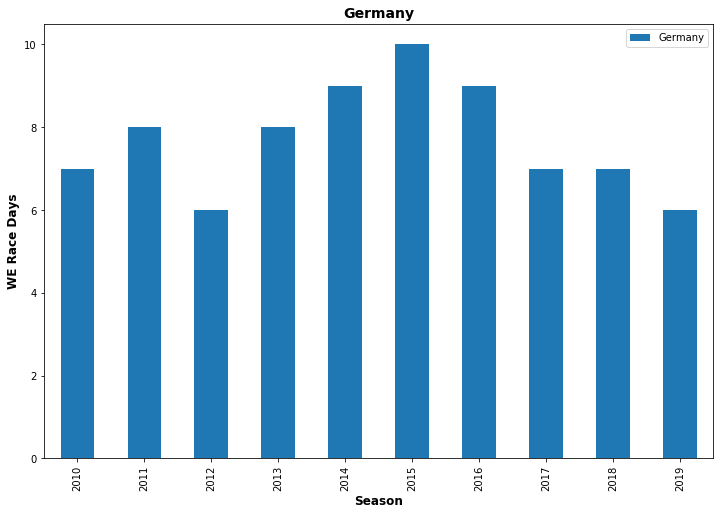

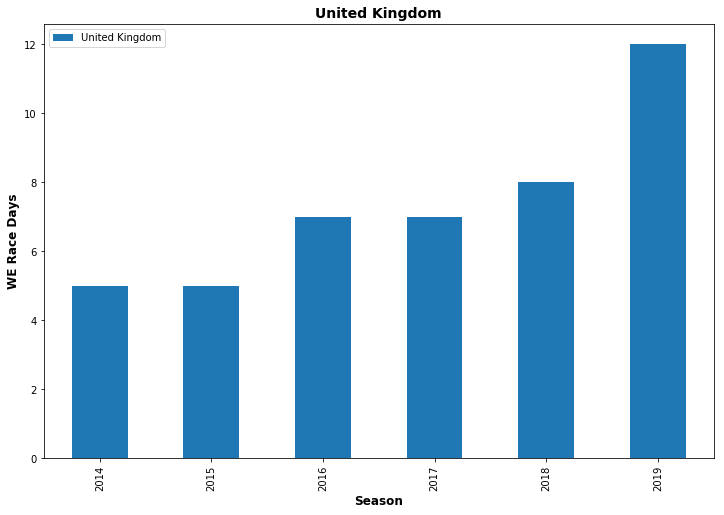

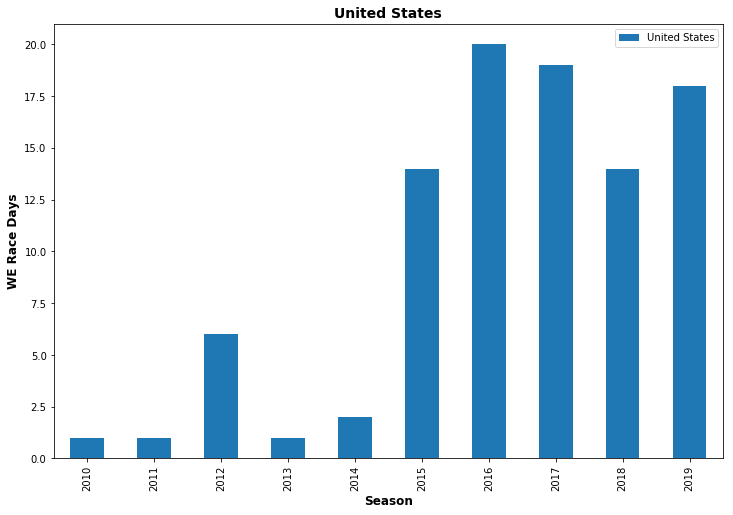

In [43]:
try:
    for item in top7:
        x = 'Season'
        y = 'WE Race Days'
        title = item
        file = 'WE_Filename_' + str(title)
        tdf = we.loc[we['name']==item]
        pdf = tdf.groupby(['name','Season'])['Race_Days'].sum().unstack('name',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

In [28]:
mean = men_races.mean()
overall_mean = mean.mean()

NameError: name 'men_races' is not defined

In [29]:
men_races.plot(kind='bar',width=0.9)
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig.ylimit=(0,200)

plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# Add some labels and title
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
plt.title('ME Races Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('races.png')

NameError: name 'men_races' is not defined

In [31]:
# top7 = ['Belgium','France','Italy','Netherlands','Spain','United Kingdom','United States']
# big7 = df.loc[df['name'].isin(top7)]
# big7 = big7.loc[big7['Category']=='WE']
# big7 = big7.groupby(['name','Season'])['Race_Days'].sum().unstack('Season')
# big7

In [32]:
# big7.plot(kind='bar',width=0.9)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Country', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('WE Race Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('we_races.png')

In [33]:
# menwomen = df.groupby(['Season','Category'])['Race_Days'].sum().unstack('Category')
# menwomen.plot(kind='bar',width=0.9,stacked=True)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Season', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('Overall Race Days per Season by Category', fontsize=14, fontweight='bold')
# plt.legend(loc='best')
# plt.savefig('overall_races_stacked.png')

In [34]:
# menwomen = df.loc[df['Continent'].isin(['Europe','Americas'])]
# menwomen = menwomen.groupby(['Continent','Category','Season'])['Race_Days'].sum().unstack(['Category','Continent'],fill_value=0)
# menwomen

In [35]:
# menwomen.plot(kind='bar',width=0.9,stacked=True)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Country', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('WE Race Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('we_races_cont_stacked.png')